In [1]:
from sklearn.datasets import load_digits #Import the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Import and explore MNIST dataset

In [2]:
#Import MNIST dataset using load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [3]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

## One hot encoding

In [5]:
#One hot encoding
def one_hot_encoding(y):
    categories = list(set(y))
    index_to_element = {index:element for index, element in enumerate(y)}
    encoded_data = []
    
    for i in range(len(y)):
        element = [0] * len(categories)
        element[index_to_element[i]] = 1
        encoded_data.append(element)
        
    return encoded_data

In [6]:
y_encoded = one_hot_encoding(y)

In [7]:
y_encoded

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0,

## Scale and split data

In [8]:
#Scale data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size = 0.2)

In [10]:
X_train.shape

(1437, 64)

## Define activation functions and its derivatives

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    return sigmoid(x) * (1 - (sigmoid(x)))

In [12]:
def relu(x):
    return np.maximum(0, x)

def deriv_relu(x):
    return (x > 0)

In [13]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def deriv_tanh(x):
    return 1 - np.tanh(x)**2

In [14]:
def mse(y, y_hat):
    return np.mean(np.square(y - y_hat))

def deriv_mse(y, y_hat):
    return (2 / len(y)) * (y_hat - y) 

## Create NeuralNetwork class

In [15]:
class NeuralNetwork:
    
    def __init__(self):
        #Initialize weights and biases. Here the NN structure is fixed as 64, 30, 10.
        self.w1 = np.random.uniform(-0.1, 0.1, size = (64, 30))
        self.b1 = np.zeros((1,30))
        self.w2 = np.random.uniform(-0.1, 0.1, size = (30, 10))
        self.b2 = np.zeros((1,10))
        self.a1 = None
        self.a2 = None
        self.z1 = None
        self.z2 = None
        self.dw1 = None
        self.dw2 = None
        self.db1 = None
        self.db2 = None
    
    def forward(self, X, act): #Forward Propagation
        self.z1 = X.dot(self.w1) + self.b1 #Dot product
        self.a1 = act(self.z1) #Applying activation function
        self.z2 = self.a1.dot(self.w2) + self.b2 #Dot product
        self.a2 = act(self.z2) #Applying activation function
    
    def backprop(self, X, y, dact): #Backpropagation
        de_dyhat = deriv_mse(y, self.a2) #(m, 10), m is sample size
        dyhat_dz2 = dact(self.z2) #(m, 10)
        dz2_dw2 = self.a1.T #(30, m)
        self.dw2 = dz2_dw2.dot(de_dyhat * dyhat_dz2)  #(30, 10)
        
        dz2_da1 = self.w2.T #(10, 30)
        da1_dz1 = dact(self.z1) #(m, 30)
        dz1_dw1 = X.T #(64, m)
        self.dw1 = X.T.dot((de_dyhat*dyhat_dz2).dot(dz2_da1)*da1_dz1) #(64, 30)
        
        self.db2 = np.sum(de_dyhat * dyhat_dz2, axis = 0, keepdims=True) #sum along axis = 0, (1, 10)
        
        self.db1 = np.sum((de_dyhat * dyhat_dz2).dot(dz2_da1) * da1_dz1, axis = 0, keepdims=True) #sum along axis = 0, (1, 30)
        
    def update_weights(self, lr): #Updating weights by gradient descent and set learning rate.
        self.w1 -= lr * self.dw1
        self.w2 -= lr * self.dw2
        self.b1 -= lr * self.db1
        self.b2 -= lr * self.db2
    
    def train(self, X, y, act, dact, lr, num_epoch): #Training neural network model
        loss_history = [] #Loss history
        epochs = []
        
        for epoch in range(num_epoch): #Train neural network for num_epochs
            self.forward(X, act) #Forward propagation
            loss_history.append(mse(y, self.a2)) #Appending MSE loss to history
            epochs.append(epoch) 
            self.backprop(X, y, dact) #Backpropagation
            self.update_weights(lr) #Gradient descent

        return loss_history, epochs
    
    def predict(self, X, y, act): #Predicting the data
        self.forward(X, act)
        return np.argmax(self.a2, axis = 1)
    
    def evaluate(self, X, y, act): #Evaluating model
        self.forward(X, act) #Forward propagation
        y_true = np.argmax(y, axis = 1) #Pick the class with highest number
        y_pred = np.argmax(self.a2, axis = 1) #Pick the class with the highest number
        
        return accuracy_score(y_true, y_pred) #Calculate accuracy and return

## Testing hyperparameters on sigmoid neural network model

Text(0, 0.5, 'MSE')

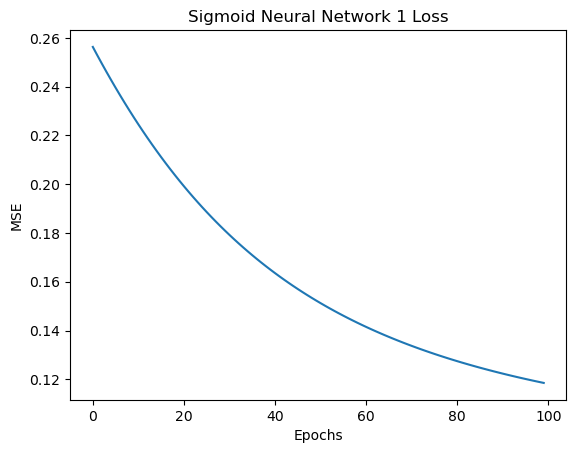

In [16]:
sigmoid_nn1 = NeuralNetwork()
loss_sigmoid1, epochs_sigmoid1 = sigmoid_nn1.train(X_train, y_train, sigmoid, deriv_sigmoid, 0.01, 100) #lr = 0.01, epochs = 100
plt.plot(epochs_sigmoid1, loss_sigmoid1)
plt.title("Sigmoid Neural Network 1 Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [17]:
sigmoid_nn1.evaluate(X_test, y_test, sigmoid) #Evaluate model

0.1361111111111111

Text(0, 0.5, 'MSE')

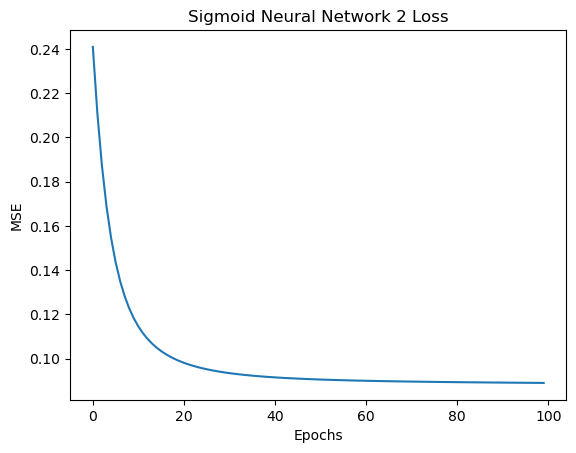

In [18]:
sigmoid_nn2 = NeuralNetwork()
loss_sigmoid2, epochs_sigmoid2 = sigmoid_nn2.train(X_train, y_train, sigmoid, deriv_sigmoid, 0.1, 100) #lr = 0.1, epochs = 100
plt.plot(epochs_sigmoid2, loss_sigmoid2)
plt.title("Sigmoid Neural Network 2 Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [19]:
sigmoid_nn2.evaluate(X_test, y_test, sigmoid) #Evaluate model

0.3388888888888889

Text(0, 0.5, 'MSE')

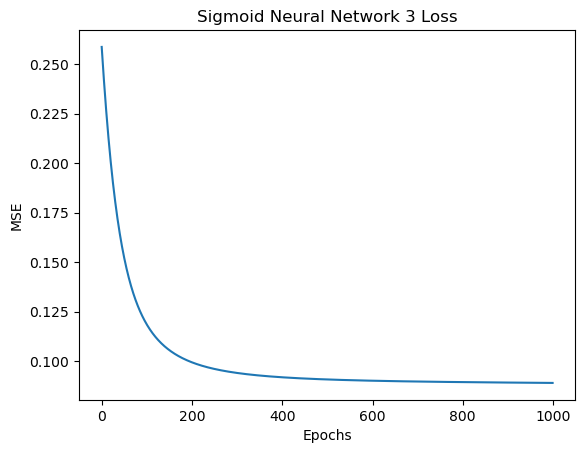

In [20]:
sigmoid_nn3 = NeuralNetwork()
loss_sigmoid3, epochs_sigmoid3 = sigmoid_nn3.train(X_train, y_train, sigmoid, deriv_sigmoid, 0.01, 1000) #lr = 0.01, epochs = 1000
plt.plot(epochs_sigmoid3, loss_sigmoid3)
plt.title("Sigmoid Neural Network 3 Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [21]:
sigmoid_nn3.evaluate(X_test, y_test, sigmoid) #Evaluate model

0.2611111111111111

Text(0, 0.5, 'MSE')

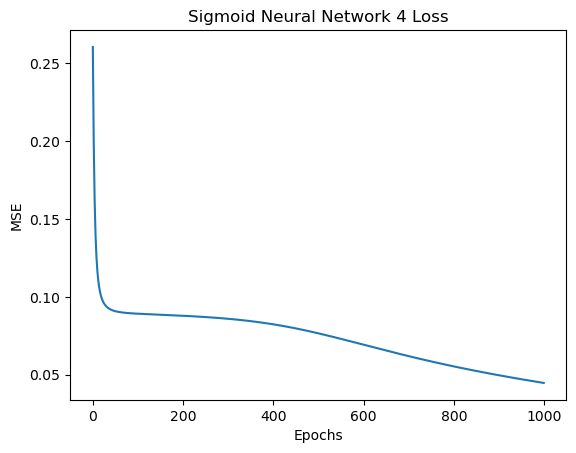

In [22]:
sigmoid_nn4 = NeuralNetwork()
loss_sigmoid4, epochs_sigmoid4 = sigmoid_nn4.train(X_train, y_train, sigmoid, deriv_sigmoid, 0.1, 1000) #lr = 0.1, epochs = 1000
plt.plot(epochs_sigmoid4, loss_sigmoid4)
plt.title("Sigmoid Neural Network 4 Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [23]:
sigmoid_nn4.evaluate(X_test, y_test, sigmoid) #Evaluate model

0.8111111111111111

# Findings from experimenting with different hyperparameters
I've experimented with changing learning rate and epochs. The base learning rate and epochs were 0.01 and 100. The first sigmoid neural network with lr = 0.01 and epochs = 100 yielded very poor results, leading to accuracy of around 10-20 percent. In the second sigmoid neural network, I've altered the learning rate only, with lr = 0.1 and epochs = 100. It resulted in a higher accuracy of 20-30 perecnt, but still was not adequate for classification. The third sigmoid neural network was traiend with lr = 0.01 and epochs = 1000. It resulted in an accuracy of 20-30 perecent, still inadequate. The fourth neural network was trained with lr = 0.1 and epochs = 1000. This resulted in a very high accuracy of around 80 percent. I've realized that having set the right hyperparameters drastically change the performance of the neural network model.

## ReLu and Tanh neural network models

Text(0, 0.5, 'MSE')

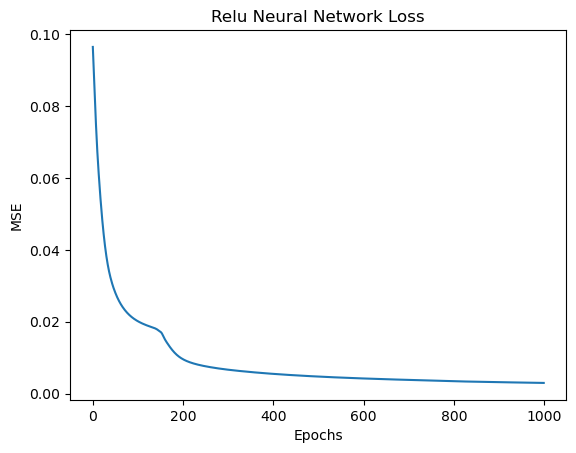

In [24]:
relu_nn = NeuralNetwork()
loss_relu, epochs_relu = relu_nn.train(X_train, y_train, relu, deriv_relu, 0.1, 1000)
plt.plot(epochs_relu, loss_relu)
plt.title("Relu Neural Network Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [25]:
relu_nn.evaluate(X_test, y_test, relu) #Evaluate model

0.9861111111111112

Text(0, 0.5, 'MSE')

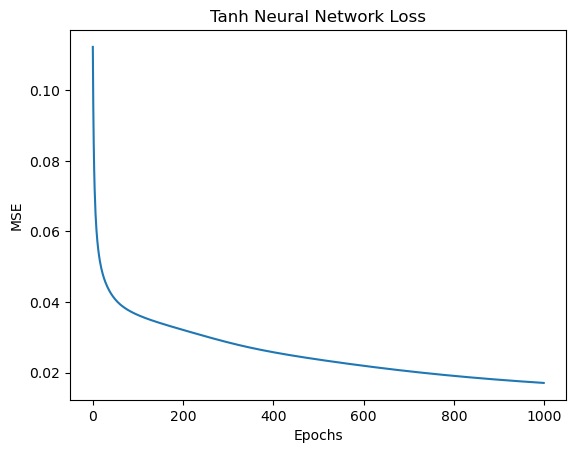

In [26]:
tanh_nn = NeuralNetwork()
loss_tanh, epochs_tanh = tanh_nn.train(X_train, y_train, tanh, deriv_tanh, 0.1, 1000)
plt.plot(epochs_tanh, loss_tanh)
plt.title("Tanh Neural Network Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [27]:
tanh_nn.evaluate(X_test, y_test, tanh) #Evaluate model

0.9777777777777777